In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=048382119eeeca0949699c7e4e4de79f98962213afd7688aae7e16edae885916
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
import pandas as pd
from google.colab import files
import json
#from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [ ]:
_ = files.upload() #upload similarity_file

Saving similarity.json to similarity.json


In [ ]:
f = open('similarity.json')
similarity = json.load(f)
f.close()

In [ ]:
for key, value in similarity.items() :
    print(key,value['date'],value['related tweets'])
    break

0 2009-01-28 [['2467791', '1156841394', 'BREAKING: The House has passed the economic stimulus bill. Update to come.', 0.5270907878875732], ['2467791', '1156119162', 'Speaking of major economic news, the Treasury Dept. has some hard choices to make to save banks. http://is.gd/hyg9 Your thoughts?', 0.5151541233062744], ['4898091', '1156250013', 'Fed keeps interest rates on hold: The Federal Reserve left interest rates unchanged as it forged ahead in its ef.. http://tinyurl.com/cdn5mp', 0.5003210306167603], ['4898091', '1155352911', 'Wall Street buoyed by bank rescue hopes: US stocks were set for a higher start as investors hoped that the Obama.. http://tinyurl.com/couuzz', 0.4975678026676178], ['4898091', '1158589125', 'Wall St mood turns on glum economic data : A glut of economic data that was even worse than expected was set to .. http://tinyurl.com/cubay4', 0.4905321002006531], ['4898091', '1157070101', 'Banks boosted as Geithner talks of a clean-up: Beaten-down US bank stocks surged 

# **REMOVE UNSIMILAR TWEETS**

In [ ]:
for key, value in similarity.items() :
    index=0
    for i in range (0,len(value['related tweets'])):
      if value['related tweets'][i][3]<0.5:
        break
      else:
        index=index+1
    value['related tweets']=value['related tweets'][:index]

In [ ]:
for key, value in similarity.items() :
  print(key,value['date'],value['related tweets'])

0 2009-01-28 [['2467791', '1156841394', 'BREAKING: The House has passed the economic stimulus bill. Update to come.', 0.5270907878875732], ['2467791', '1156119162', 'Speaking of major economic news, the Treasury Dept. has some hard choices to make to save banks. http://is.gd/hyg9 Your thoughts?', 0.5151541233062744], ['4898091', '1156250013', 'Fed keeps interest rates on hold: The Federal Reserve left interest rates unchanged as it forged ahead in its ef.. http://tinyurl.com/cdn5mp', 0.5003210306167603]]
1 2009-03-18 [['3108351', '1348473316', 'Markets Watching the Fed http://bit.ly/Mw5mc', 0.5768254399299622], ['3108351', '1349769339', 'BREAKING NEWS: Fed plans to buy up to $300 billion of longer-term Treasurys over next six months. http://tinyurl.com/cqtdaw', 0.5446392893791199], ['3108351', '1350091684', 'Fed Commits to Buying Treasurys http://bit.ly/fcM0', 0.5352004766464233], ['3108351', '1351619318', 'Fed Commits to Buying Treasurys http://u.mavrev.com/24jc', 0.5146897435188293],

# **EMOTION CLASSIFICATION**

In [ ]:
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

/usr/local/lib/python3.8/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
emotion_dataset = pd.DataFrame(columns=['authorID','TweetID','Text','DateofStatement','Emotion','Score'])

for key, value in similarity.items() :
  for i in range (0,len(value['related tweets'])):
    tweet_text=value['related tweets'][i][2]
    tweet_timeline=value['related tweets'][i][0]
    tweet_id=value['related tweets'][i][1]

    prediction=classifier(tweet_text)
    higher_emotion = max(prediction[0], key=lambda x:x['score'])
    emotion_dataset.loc[len(emotion_dataset.index)] = [tweet_timeline, tweet_id, tweet_text, value['date'], higher_emotion['label'],higher_emotion['score']]

In [ ]:
#_ = files.upload() #upload similarity_file
emotion_dataset=pd.read_csv("emotion_dataset.csv",index_col=0)
emotion_dataset

,authorID,TweetID,Text,DateofStatement,Emotion,Score
0,2467791,1156841394,BREAKING: The House has passed the economic st...,2009-01-28,neutral,0.719480
1,2467791,1156119162,"Speaking of major economic news, the Treasury ...",2009-01-28,neutral,0.660500
2,4898091,1156250013,Fed keeps interest rates on hold: The Federal ...,2009-01-28,neutral,0.768273
3,3108351,1348473316,Markets Watching the Fed http://bit.ly/Mw5mc,2009-03-18,neutral,0.834186
4,3108351,1349769339,BREAKING NEWS: Fed plans to buy up to $300 bil...,2009-03-18,surprise,0.548605
...,...,...,...,...,...,...
570,3108351,1521960356091875328,Federal Reserve Chairman Jerome Powell said th...,2022-05-04,fear,0.800697
571,3108351,1522044686885605377,The Federal Reserve's interest-rate hike on We...,2022-05-04,neutral,0.441837
572,3108351,1521916892964962304,The Federal Reserve's interest-rate hike on We...,2022-05-04,neutral,0.436735
573,2467791,1521866499497078784,The Federal Reserve is expected to raise inter...,2022-05-04,neutral,0.704036


In [ ]:
def get_plot(statement_date,timeline):
  x=emotion_dataset[(emotion_dataset['DateofStatement']==statement_date) & (emotion_dataset['authorID']==timeline) ]['Emotion']
  fig=x.value_counts()/len(x)
  fig.plot.bar()
  plt.yticks(np.linspace(0,1,11))
  plt.show()

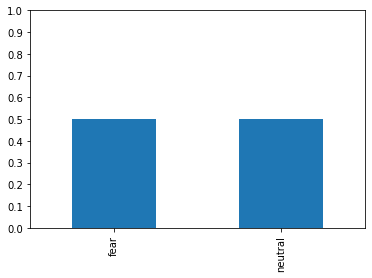

In [ ]:
get_plot('2022-05-04','3108351')

# **EMOTION DICT**

In [ ]:
_ = files.upload() #upload emotion_dataset

Saving emotion_dataset.csv to emotion_dataset.csv


In [ ]:
emotion_dataset=pd.read_csv('emotion_dataset.csv',index_col=0)
emotion_dataset

,authorID,TweetID,Text,DateofStatement,Emotion,Score
0,2467791,1156841394,BREAKING: The House has passed the economic st...,2009-01-28,neutral,0.719480
1,2467791,1156119162,"Speaking of major economic news, the Treasury ...",2009-01-28,neutral,0.660500
2,4898091,1156250013,Fed keeps interest rates on hold: The Federal ...,2009-01-28,neutral,0.768273
3,3108351,1348473316,Markets Watching the Fed http://bit.ly/Mw5mc,2009-03-18,neutral,0.834186
4,3108351,1349769339,BREAKING NEWS: Fed plans to buy up to $300 bil...,2009-03-18,surprise,0.548605
...,...,...,...,...,...,...
570,3108351,1521960356091875328,Federal Reserve Chairman Jerome Powell said th...,2022-05-04,fear,0.800697
571,3108351,1522044686885605377,The Federal Reserve's interest-rate hike on We...,2022-05-04,neutral,0.441837
572,3108351,1521916892964962304,The Federal Reserve's interest-rate hike on We...,2022-05-04,neutral,0.436735
573,2467791,1521866499497078784,The Federal Reserve is expected to raise inter...,2022-05-04,neutral,0.704036


# ***OVERALL EMOTION DISTRIBUTION***

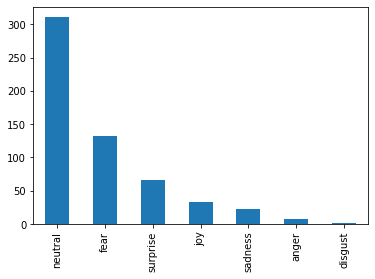

In [ ]:
fig=emotion_dataset['Emotion'].value_counts()
fig.plot.bar()
plt.yticks()
plt.show()

In [ ]:
JSON_emotions= defaultdict(lambda: defaultdict(lambda: 0))
statements=emotion_dataset['DateofStatement'].unique()


for statement in statements:
  nested_dict={}
  tweets_per_statement=emotion_dataset[emotion_dataset['DateofStatement']==statement]
  for i in range(0,len(tweets_per_statement)):
    authorID=tweets_per_statement.iloc[i]['authorID']
    emotion=tweets_per_statement.iloc[i]['Emotion']
    score=tweets_per_statement.iloc[i]['Score']
    
    if authorID in nested_dict:
      nested_dict[int(authorID)].append((emotion,score))
    else:
      nested_dict[int(authorID)]=[(emotion,score)]

  JSON_emotions[statement]=nested_dict

In [ ]:
JSON_emotions

defaultdict(<function __main__.<lambda>()>,
            {'2009-01-28': {2467791: [('neutral', 0.719479501247406),
               ('neutral', 0.6604997515678406)],
              4898091: [('neutral', 0.7682725787162781)]},
             '2009-03-18': {3108351: [('neutral', 0.8341857194900513),
               ('surprise', 0.5486052632331848),
               ('neutral', 0.9001668691635132),
               ('neutral', 0.9027439951896667)],
              4898091: [('fear', 0.9816309809684752),
               ('surprise', 0.4610197246074676),
               ('fear', 0.6620641350746155)]},
             '2009-04-29': {2467791: [('neutral', 0.8274925351142883)]},
             '2009-06-24': {3108351: [('neutral', 0.9088473320007324)],
              4898091: [('neutral', 0.4241884648799896)]},
             '2009-08-12': {3108351: [('neutral', 0.7414996027946472),
               ('sadness', 0.3389852046966553),
               ('neutral', 0.6002309322357178)]},
             '2009-09-23': {4898091: [

In [ ]:
# Serializing json
json_object = json.dumps(JSON_emotions, indent=4)
 
# Writing to sample.json
with open("emotions_per_timeline_per_statement.json", "w") as outfile:
    outfile.write(json_object)